In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore') 
filename= r'C:\Users\shqkd\Desktop\rnn\6주차_음성테스트.wav'
ori_sent = '이 파일은 인공지능 6주차 수업의 보조자료입니다'

In [5]:
input_length=16000*4
def audio_norm(data):

    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data) 
    return data 

def load_audio_file(file_path, input_length=input_length):
    
    data, sr = librosa.load(file_path, sr=None)
    
    max_offset = abs(len(data)-input_length)
    offset = np.random.randint(max_offset)
    if len(data)>input_length:
        data = data[offset:(input_length+offset)]
    else:
        data = np.pad(data, (offset, input_size - len(data) - offset), "constant")
        
    data = audio_norm(data)
    return data

In [6]:
y, sr = librosa.load(filename)
IPython.display.Audio(data=y, rate=sr)

NameError: name 'IPython' is not defined

In [ ]:
data_base = load_audio_file(filename)

fig = plt.figure(figsize=(14, 8))
plt.title('Raw wave ')
plt.ylabel('Amplitude')
plt.plot(np.linspace(0, 1, input_length), data_base)
plt.show()

In [7]:
def preprocess_audio_mel_T(audio, sample_rate=16000, window_size=20, #log_specgram
                 step_size=10, eps=1e-10):

    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels= 256)
    mel_db = (librosa.power_to_db(mel_spec, ref=np.max) + 40)/40

    return mel_db.T

def load_audio_file2(file_path, input_length=input_length):
    
    data, sr = librosa.load(file_path, sr=None)
    
    max_offset = abs(len(data)-input_length)
    offset = np.random.randint(max_offset)
    if len(data)>input_length:
        data = data[offset:(input_length+offset)]
    else:
        data = np.pad(data, (offset, input_size - len(data) - offset), "constant")
        
    data = preprocess_audio_mel_T(data, sr)
    return data

(126, 256)


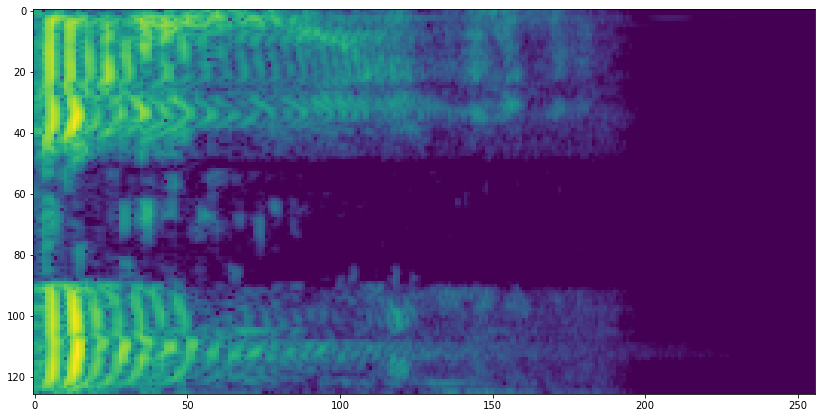

In [8]:
data_base = load_audio_file2(filename)
print(data_base.shape)
fig = plt.figure(figsize=(14, 8))
plt.imshow(data_base)

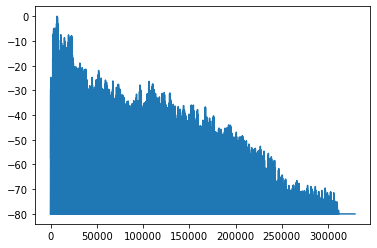

In [9]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.plot(D.flatten())
plt.show()

In [10]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128) 
 
log_S = librosa.power_to_db(S) #, ref_power=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

AttributeError: module 'librosa' has no attribute 'display'

<Figure size 864x288 with 0 Axes>

In [11]:
min_level_db = -100
 
def _normalize(S):
    return np.clip((S - min_level_db) / -min_level_db, 0, 1)


norm_S = _normalize(log_S)
 
plt.figure(figsize=(12, 4))
librosa.display.specshow(norm_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('norm mel power spectrogram')
plt.colorbar(format='%+0.1f dB')
plt.tight_layout()
plt.show()

AttributeError: module 'librosa' has no attribute 'display'

<Figure size 864x288 with 0 Axes>

In [13]:
import hgtk

ori_sent = '이 파일은 인공지능 6주차 수업의 보조자료입니다'
jamo_sent = hgtk.text.decompose(ori_sent)
jamo_sent = jamo_sent.replace('ᴥ', '')
print(jamo_sent)

ㅇㅣ ㅍㅏㅇㅣㄹㅇㅡㄴ ㅇㅣㄴㄱㅗㅇㅈㅣㄴㅡㅇ 6ㅈㅜㅊㅏ ㅅㅜㅇㅓㅂㅇㅢ ㅂㅗㅈㅗㅈㅏㄹㅛㅇㅣㅂㄴㅣㄷㅏ
